In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.RainTomorrow.value_counts() / len(df) * 100

No     75.839406
Yes    21.914616
Name: RainTomorrow, dtype: float64

The dataset is imbalanced with more NO values than Yes

In [6]:
df.isnull().sum()### total null values

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
df_handled_nans = df[df.RainTomorrow.notna()]

In [8]:
### creating a new column by month
df_handled_nans["Month"] = pd.DatetimeIndex(df_handled_nans["Date"]).month
df_handled_nans["Month"].unique()

<ipython-input-8-a435beaa13c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_handled_nans["Month"] = pd.DatetimeIndex(df_handled_nans["Date"]).month


array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [9]:
df_groupby_month_mean = df_handled_nans.groupby(by=["Month"]).mean()
cols_nans_replace_monthly_mean = list(df_groupby_month_mean.columns)
df_groupby_month_mean.head(12)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
Month,,,,,,,,,,,,,,,,
1,17.520778,29.547362,2.719036,8.773171,9.208942,43.361730,15.297464,20.144392,62.245485,46.287821,1012.785742,1010.601596,4.478040,4.225673,22.527104,27.654384
2,17.500239,28.877704,3.174075,7.651018,8.607494,41.457472,14.387998,19.204820,66.936925,48.939291,1014.495694,1012.373761,4.494022,4.397961,21.789254,27.129455
3,15.904347,26.886744,2.801304,6.237989,7.646279,39.546399,13.306901,18.444410,70.813463,50.340329,1016.769077,1014.558906,4.479871,4.488169,19.881682,25.339822
4,12.831979,23.611845,2.314764,4.547511,7.107208,36.460285,12.837395,17.125909,70.790388,52.190915,1019.649115,1017.054824,4.489694,4.682758,17.672198,22.229975
5,9.618572,20.047202,1.978896,3.244134,6.337496,35.721056,12.364471,16.325914,74.697111,55.186362,1020.448532,1017.949784,4.453519,4.722064,14.097919,18.804493
6,7.815031,17.324778,2.781114,2.518705,5.660379,35.506375,12.238901,15.839022,79.419405,60.512935,1021.194259,1018.869867,4.732892,4.894100,11.567195,16.194397
7,6.951308,16.764242,2.179314,2.699269,6.069790,37.891458,12.921221,17.316817,77.477703,57.949414,1021.115173,1018.721077,4.448593,4.687976,10.838687,15.647109
8,7.465145,18.258930,2.029610,3.616533,7.171661,40.245052,13.819246,18.902653,71.366348,52.768436,1019.599575,1016.985671,4.085112,4.375206,12.385347,16.963310
9,9.460189,20.772510,1.875851,4.917265,7.698770,42.213311,15.441355,20.156021,64.814755,50.174507,1018.067078,1015.264174,4.117416,4.261822,15.361451,19.211731


In [10]:
for indx, row in df_handled_nans.iterrows():
    curr_month = row.Month
    for col in cols_nans_replace_monthly_mean:
        if (str(df_handled_nans.at[indx, col]) == 'nan'):
            df_handled_nans.loc[:, col][indx] = df_groupby_month_mean.at[curr_month, col]

<ipython-input-10-9375255edbb0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_handled_nans.loc[:, col][indx] = df_groupby_month_mean.at[curr_month, col]
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
### getting the mode of each class so we can replace nan values
df_groupby_month_mode = df_handled_nans[["Month","WindGustDir","WindDir9am","WindDir3pm","RainToday"]].groupby(by=["Month"]).agg(lambda x:x.value_counts().index[0])
cols_nans_replace_monthly_mode = list(df_groupby_month_mode.columns)
df_groupby_month_mode.head(12)

,WindGustDir,WindDir9am,WindDir3pm,RainToday
Month,,,,
1,SE,SE,SE,No
2,SE,SSE,SE,No
3,SE,SE,SE,No
4,S,SSE,SE,No
5,W,N,W,No
6,N,N,N,No
7,N,N,N,No
8,W,N,W,No
9,W,N,W,No


In [12]:
df_handled_nans['RainToday'] = df_handled_nans['RainToday'].map({'Yes': 1, 'No': 0})
df_handled_nans['RainTomorrow'] = df_handled_nans['RainTomorrow'].map({'Yes': 1, 'No': 0})

<ipython-input-12-f24e497262f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_handled_nans['RainToday'] = df_handled_nans['RainToday'].map({'Yes': 1, 'No': 0})
<ipython-input-12-f24e497262f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_handled_nans['RainTomorrow'] = df_handled_nans['RainTomorrow'].map({'Yes': 1, 'No': 0})


In [13]:
col_to_one_hot_encode = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm"]

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

for feature in col_to_one_hot_encode:
    df_handled_nans = encode_and_bind(df_handled_nans, feature)

In [30]:
attributes_to_consider = ["MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustSpeed","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am","Temp3pm"]     


In [15]:
df = df_handled_nans[attributes_to_consider]

## ------------End of pre-processing-----------------

### Calculating VIFs

In [31]:
# calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
def variance_inflation_factors(exog_df):
    exog_df = add_constant(exog_df)
    vifs = pd.Series(
        [1 / (1. - OLS(exog_df[col].values, 
                       exog_df.loc[:, exog_df.columns != col].values).fit().rsquared) 
         for col in exog_df],
        index=exog_df.columns,
        name='VIF'
    )
    return vifs

In [17]:
variance_inflation_factors(df)

const            37312.769932
MinTemp              8.567222
MaxTemp             23.962378
Rainfall             1.147245
Evaporation          1.697808
Sunshine             1.989846
WindGustSpeed        2.430971
WindSpeed9am         1.807841
WindSpeed3pm         1.960555
Humidity9am          3.659381
Humidity3pm          5.256543
Pressure9am         17.226343
Pressure3pm         17.097058
Cloud9am             1.768836
Cloud3pm             1.789502
Temp9am             19.011177
Temp3pm             25.138454
Name: VIF, dtype: float64

In [18]:
# creating new features considering their differences
df['WindSpeed_difference'] = abs(df.WindSpeed9am - df.WindSpeed3pm)
df['Humidity_difference'] = abs(df.Humidity9am - df.Humidity3pm)
df['Pressure_difference'] = abs(df.Pressure9am - df.Pressure3pm)
df['Cloud_difference'] = abs(df.Cloud9am - df.Cloud3pm)
df['temp_difference'] = abs(df.Temp9am - df.Temp3pm)

<ipython-input-18-b94f1cf12452>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WindSpeed_difference'] = abs(df.WindSpeed9am - df.WindSpeed3pm)
<ipython-input-18-b94f1cf12452>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Humidity_difference'] = abs(df.Humidity9am - df.Humidity3pm)
<ipython-input-18-b94f1cf12452>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [19]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,WindSpeed_difference,Humidity_difference,Pressure_difference,Cloud_difference,temp_difference
0,13.4,22.9,0.6,8.046298,8.975372,44.0,20.0,24.0,71.0,22.0,...,1007.1,8.000000,4.510468,16.9,21.8,4.0,49.0,0.6,3.489532,4.9
1,7.4,25.1,0.0,8.046298,8.975372,44.0,4.0,22.0,44.0,25.0,...,1007.8,4.647435,4.510468,17.2,24.3,18.0,19.0,2.8,0.136967,7.1
2,12.9,25.7,0.0,8.046298,8.975372,46.0,19.0,26.0,38.0,30.0,...,1008.7,4.647435,2.000000,21.0,23.2,7.0,8.0,1.1,2.647435,2.2
3,9.2,28.0,0.0,8.046298,8.975372,24.0,11.0,9.0,45.0,16.0,...,1012.8,4.647435,4.510468,18.1,26.5,2.0,29.0,4.8,0.136967,8.4
4,17.5,32.3,1.0,8.046298,8.975372,41.0,7.0,20.0,82.0,33.0,...,1006.0,7.000000,8.000000,17.8,29.7,13.0,49.0,4.8,1.000000,11.9


In [20]:
vif = variance_inflation_factors(df)
vif

const                   37969.985555
MinTemp                     8.816301
MaxTemp                    29.824047
Rainfall                    1.150775
Evaporation                 1.706429
Sunshine                    2.008510
WindGustSpeed               2.512302
WindSpeed9am                2.302524
WindSpeed3pm                2.576497
Humidity9am                 7.152276
Humidity3pm                 8.763379
Pressure9am                35.035508
Pressure3pm                35.833768
Cloud9am                    1.771584
Cloud3pm                    1.791512
Temp9am                    37.336616
Temp3pm                    34.457835
WindSpeed_difference        1.639938
Humidity_difference         4.239090
Pressure_difference         2.496173
Cloud_difference            1.029291
temp_difference             8.981880
Name: VIF, dtype: float64

In [21]:
df_after_vif = df.copy()

In [22]:
for col in df.columns:
    if (vif[col]) > 5.0:
        print(f"Dropping: {col}")
        df_after_vif.drop(columns=[col], inplace=True)

Dropping: MinTemp
Dropping: MaxTemp
Dropping: Humidity9am
Dropping: Humidity3pm
Dropping: Pressure9am
Dropping: Pressure3pm
Dropping: Temp9am
Dropping: Temp3pm
Dropping: temp_difference


### After dropping based on VIF

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics
X = df_after_vif
y = df_handled_nans['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
y_pred_test = logreg.predict(X_test)

In [24]:
y_pred_train = logreg.predict(X_train)
print("After dropping based upon VIF")
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

After dropping based upon VIF
Training set score: 0.8140
Test set score: 0.8113


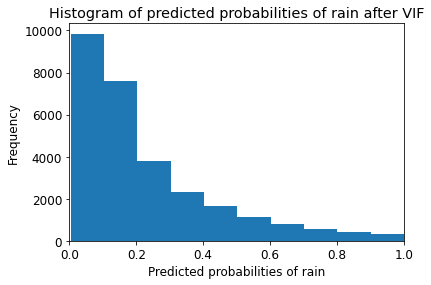

In [25]:
y_pred1 = logreg.predict_proba(X_test)[:, 1]
plt.rcParams['font.size'] = 12
plt.hist(y_pred1, bins = 10)
plt.title('Histogram of predicted probabilities of rain after VIF')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')
plt.show()

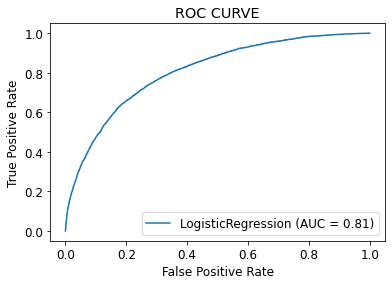

In [26]:
metrics.plot_roc_curve(logreg, X_test, y_test)
plt.title('ROC CURVE')
plt.show()

### WITHOUT REMOVING ANY ATTRIBUTES BASED ON VIF

In [27]:
X = df
y = df_handled_nans['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
y_pred_test = logreg.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
y_pred_train = logreg.predict(X_train)
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Model accuracy score: 0.8377
Training set score: 0.8413
Test set score: 0.8377


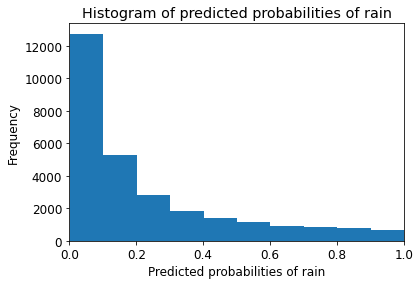

In [28]:
y_pred1 = logreg.predict_proba(X_test)[:, 1]
plt.rcParams['font.size'] = 12
plt.hist(y_pred1, bins = 10)
plt.title('Histogram of predicted probabilities of rain')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')
plt.show()

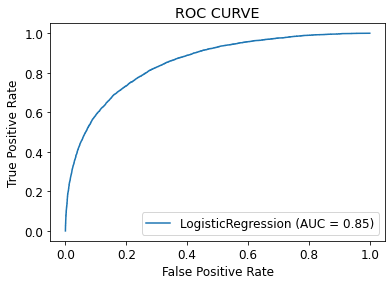

In [32]:
metrics.plot_roc_curve(logreg, X_test, y_test) 
plt.title('ROC CURVE')
plt.show()

Accuracy of the model decreased after removing attributes with VIF < 5.<br>
Before accuracy : 0.8377 <br>
After accuracy : 0.8113